[Reference](https://medium.com/analytics-vidhya/one-way-analysis-of-variance-anova-with-python-514417babcb4)

In [2]:
import pandas as pd

In [4]:
a=[25,25,27,30,23,20]
b=[30,30,21,24,26,28]
c=[18,30,29,29,24,26]
list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df

,A,B,C
0,25,30,18
1,25,30,30
2,27,21,29
3,30,24,29
4,23,26,24
5,20,28,26


In [5]:
import numpy as np
m1=np.mean(a)
m2=np.mean(b)
m3=np.mean(c)

print('Average mark for college A: {}'.format(m1))
print('Average mark for college B: {}'.format(m2))
print('Average mark for college C: {}'.format(m3))

Average mark for college A: 25.0
Average mark for college B: 26.5
Average mark for college C: 26.0


In [6]:
m=(m1+m2+m3)/3 
print('Overall mean: {}'.format(m)) 

Overall mean: 25.833333333333332


In [7]:
SSb=6*((m1-m)**2+(m2-m)**2+(m3-m)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))

Between-groups Sum of Squared Differences: 6.999999999999999


In [8]:
MSb=SSb/2
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 3.4999999999999996


In [10]:
err_a=list(a-m1)
err_b=list(b-m2)
err_c=list(c-m3)
err=err_a+err_b+err_c
ssw=[]
for i in err:
    ssw.append(i**2)
    
SSw=np.sum(ssw)
print('Within-group Sum of Squared Differences: {}'.format(SSw))

Within-group Sum of Squared Differences: 223.5


In [11]:
MSw=SSw/15
print('Within-group Mean Square value: {}'.format(MSw))

Within-group Mean Square value: 14.9


In [12]:
F=MSb/MSw 
print('F-score: {}'.format(F)) 

F-score: 0.23489932885906037


In [13]:
import scipy.stats as stats 
stats.f_oneway(a,b,c) 

F_onewayResult(statistic=0.2348993288590604, pvalue=0.793504662732833)

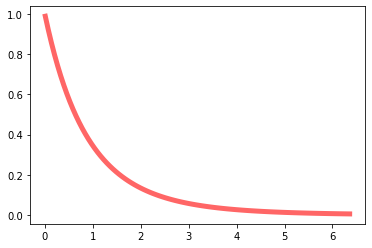

In [14]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')

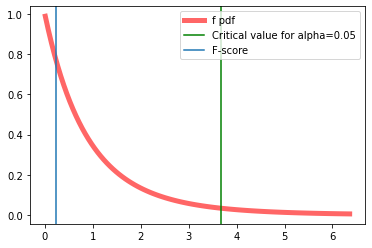

In [15]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')
plt.axvline(x=3.68, label='Critical value for alpha=0.05', color='g')
plt.axvline(x=F, label='F-score')
plt.legend()